(logo-label)=
# Logo

```{image} img/portada.png
:alt: portada
:class: bg-primary mb-1
:width: 450px
:align: center
```

Este capítulo va a ser una excepción porque no vamos a programar un juego, aunque el resultado va a ser tan entretenido como si lo fuera. Vamos a implementar una versión simplficada de un lenguaje de programacion!!. Y ese lenguage de programación va a ser el LOGO. 

Es normal que no te suene. LOGO es un lenguaje de programación que fue diseñado en 1967 con fines educativos. Y fue muy conocido, principalmente, por sus capacidades gráficas.

Para dibujar programando en LOGO existían unas instrucciones que desplazaban por la pantalla una tortuga virtual que iba dejando un rastro que servía para componer dibujos. En nuestro caso, vamos a introducir estas instrucciones a través de una linea de comando. Estas instrucciones son:


| Comando |                Descripción               |
|:-------:|:----------------------------------------:|
|   fd x  |   forward => tortuga avanza x unidades   |
|   bk x  | backward => tortuga retrocede x unidades |
|   rt x  |    right => gira a la derecha x grados   |
|    lt   |   left => gira a la izquierda x grados   |

Por ejemplo:

```{image} img/turtle_commands.jpg
:alt: turtle_commands
:class: bg-primary mb-1
:width: 450px
:align: center
```

Combinando los comandos anteriores y utilizando diferentes desplazamientos y grados se pueden conseguir una gran variedad de diseños. También vamos a implementar una versión simplificada del comando **repeat** que sirve para repetir N veces una serie de movimientos proporcionados entre corchetes:

:::{code}
repeat N [ acc1 d1 acc2 d2 ] 
:::

Por ejemplo, el código:

:::{code}
repeat 4 [fd 100 rt 90]
:::    

Genera un cuadrado con una sóla instrucción:

```{image} img/repetition_practice_1.jpg
:alt: drawing
:class: bg-primary mb-1
:width: 300px
:align: center
```

En el LOGO original existen muchas otras funciones que no vamos a programar como pero que puedes plantearte implementar para mejorar nuestra versión.

| Comando |                Descripción               |
|:-------:|:----------------------------------------:|
|   pu    |   penup (mover la tortuga sin dibujar)   |
|   pd    |   pendown (mover la tortuga dibujando)   |
|   ht    |   hideturtle (ocultar la tortuga)        |
|   dt    |   showturtle (mostrar la tortuga)        |

:::{seealso}
Puedes encontrar más información sobre este lenguanje de programación [aquí](https://en.wikipedia.org/wiki/Logo_(programming_language))
:::

## Dibujar trayectoria

Vamos a empezar escribiendo una función **draw_coordinates(coordinates)** que recibe como único argumento de entrada una lista de tuplas que contienen coordenadas (x,y). La función debe dibujar un grafico con **matplotlib** que conecte punto por punto cada tupla en el mismo orden en el que se proporcionan.

Por ejemplo:

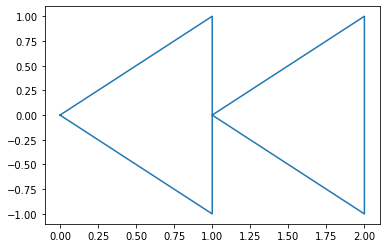

In [3]:
draw_coordinates([(0,0),(1,1),(1,0),(2,1),(2,-1),(1,0),(1,-1),(0,0)])

Puedes hacer el ejercicio de ir conectando las coordenadas del comando anterior y obtendrás la misma figura.

### Solución:

In [4]:
import matplotlib.pyplot as plt
import math

def draw_coordinates(coordinates):
    x, y = [],[]
    
    for coor_x,coor_y in coordinates:
        x.append(coor_x)
        y.append(coor_y)

    plt.plot(x,y)
    plt.show()

## Añade movimiento

El siguiente paso es construir la función **move(distance, direction, coordinates, isForward)**. Esta función recibirá varios argumentos:

* **distance** es una variable numérica que indica la distancia en la que debe moverse la tortuga
* **direction** es una variable numérica contiene los grados en los que se realiza el movimiento. Para simplificar nuestra implementación vamos a suponer que la referencia en los grados es siempre la misma. Es decir, no es relativa a la visión de la tortuga, sino a la nuestra. Por lo que si queremos que la tortuga avance hacia la derecha, **direction** deberá ser cero, si queremos que suba **direction** será igual a 90, si queremos que avanze hacia la izquierda **direction** será igual a 180 y si queremos que baje, **direction** tomará el valor 270.
* **coordinates** es una variable tipo LISST en la que se almacenan las coordenadas de los anteriores movimientos de la tortuga
* **isForward** es una variable binaria que sólo puede tomar dos valores, 1 si queremos que la tortuga avance o -1 si queremos que retroceda

Con toda esta información, la función debe calcular las coordenadas del nuevo punto en el que se dentendrá la tortuga después de aplicar el movimiento descrito por las variables **distance**, **direction** y **isForward** respecto a la última posición conocida. Por lo que la salida de la función será la lista de coordenadas original más una coordenada nueva.

Por ejemplo. Vamos a dibujar un triángulo con vertices en las coordenadas [(1,1),(2,2),(3,1)]. Si lo pintamos obtenemos un triángulo sin base:

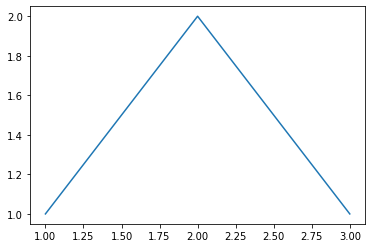

In [10]:
draw_coordinates([(1,1),(2,2),(3,1)])

Tenemos que ejecutar una última instrucción para decirle a la tortuga de LOGO (que se encuentra en la coordenada (3,1)) que gire se desplace hacia la izquierda 2 unidades para que vuelva al punto de partida. Eso lo podemos hacer con el siguiente código:

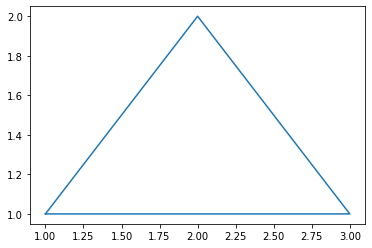

In [8]:
coordinates=[(1,1),(2,2),(3,1)]
new_coordinates=move(2,180,coordinates, 1)
draw_coordinates(new_coordinates)

Si imprimimos la lista de nuevas coordenadas vemos que se ha añadido un nuevo punto que coincide con el punto de partida:

In [9]:
print(new_coordinates)

[(1, 1), (2, 2), (3, 1), (1.0, 1.0000000000000002)]


::::{tip}
Recuerda que la dirección se la vamos a pasar en grados pero las funciones **sin** and **cos** utilizadas para calcular la nueva coordenada necesitan el ángulo en radianes.
::::

### Solución:

In [5]:
def move(distance, direction, coordinates, isForward): 
    
    new_coordinates = coordinates.copy()
    direction = math.radians(direction)
    x = math.cos(direction)*distance * isForward + new_coordinates[-1][0]
    y = math.sin(direction)*distance * isForward + new_coordinates[-1][1]
    
    new_coordinates.append((x,y))
    return new_coordinates

## Línea de comandos

Para que el usuario introduzca las instrucciones de LOGO, en algún momento del programa principal invocaremos una instrucción **input**. El usuario puede introducir una única instrucción o una lista de ellas. Para identificar las instrucciones, vamos a construir la función **get_instructions(user_input)**. Esta función recibe como argumento una variable STRING con el comando o los comandos introducidos por el usuario. La función debe utilizar la función **split** para separar el comando de LOGO por espacios. La función **get_instructions(user_input)** devuelve una lista de enteros que se corresponden con las posiciones de los elementos de la variable **user_input** que se corresponden con comandos de LOGO.

Por ejemplo:

In [9]:
get_instructions("fd 40 rt 30 bk 12 lt 180 fd 57 repeat 4 [fd 100 rt 90]")

[0, 2, 4, 6, 8, 10]

Los valores devueltos por el comando anterior se corresponden con las posiciones de los comandos **fd**, **rt**, **bk**, **lt**, **fd** y **repeat** en la lista **['fd', '40', 'rt', '30', 'bk', '12', 'lt', '180', 'fd', '57', 'repeat', '4', '[fd', '100', 'rt', '90]']**.

:::{tip}
La manera mas sencilla es implementar un bucle después de hacer un **split** e ir chequeando cuales de los elementos separados son comandos y cuales no.
:::

::::{note}
Por simplificar, asumimos que si la secuencia de instrucciones contiene el comando **repeat**, este aparecerá siempre como la última instrucción o como única instrucción.
::::

### Solución:

In [12]:
def get_instructions(user_input):
    index = []
    current_index = 0
    user_input_split = user_input.split(' ')
    while current_index < len(user_input_split):
        if user_input_split[current_index].lower() in ['fd', 'bk', 'rt', 'lt']: 
            index.append(current_index) 
            current_index +=2
        elif user_input_split[current_index].lower() == 'repeat': 
            index.append(current_index)
            break
    return index

## Decodificar el comando 

La parte más complicada de un lenguaje de programación es implementar la forma en la que se intepretan los comandos. En nuestro caso tenemos que conseguir traducir los comandos que hemos introducido y convertirlos en llamadas a la función **move**.

Para ello vamos a implementar la función **decode_input(user_input, coordinates, direction)** que recibe los siguientes argumentos de entrada:

* **user_input** contiene la variable string con las instrucciones introducidas por el usuario
* **coordinates** con la lista de coordenadas realizadas por la tortuga
* **direction** con la última orientación de la tortuga. Esta variable es especialmente importante en los comandos "fd" y "bk" en los que la tortuga debe seguir o retroceder en la misma dirección que llevaba en el último movimiento.

La función devolverá una tupla con dos elementos:

* **new_coordinates** con una lista con las coordenadas actualizadas
* **new_orientation**  con la última orientación de la tortuga. 

Esta función debe utilizar la función **get_instructions** para obtener las posiciones de los comandos de LOGO, interpretarlos y  actualizar la posición y la orientación de la tortuga.

Vamos a intentar explicarlo mejor con un ejemplo. Vamos a intentar dibujar una escalera como esta:

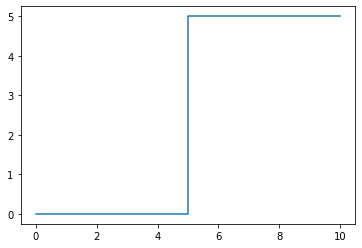

In [13]:
draw_coordinates([(0, 0), (5, 0), (5, 5), (10, 5)])

El primer comando define el desplazamiento de 5 unidades en la dirección inicial (direction = 0)

In [18]:
decode_input("fd 5", [(0,0)], direction=0)

([(0, 0), (5.0, 0.0)], 0)

El segundo comando define un giro a la izquierda de 90 grados. Fijate como este comando no añade una coordenada nueva pero sí actualiza la orientación de la tortuga

In [19]:
decode_input("fd 5 lt 90", [(0,0)], direction=0)

([(0, 0), (5.0, 0.0)], 90.0)

El tercer comando define un avance en vertical de 5 unidades, sin afectar a la orientación de la tortuga que sigue valiendo 90 grados

In [20]:
decode_input("fd 5 lt 90 fd 5", [(0,0)], direction=0)

([(0, 0), (5.0, 0.0), (5.0, 5.0)], 90.0)

El cuarto comando gira la tortuga 90 grados hacia la derecha devolviendo la orientación de la tortuga a los 0 grados originales

In [21]:
decode_input("fd 5 lt 90 fd 5 rt 90", [(0,0)], direction=0)

([(0, 0), (5.0, 0.0), (5.0, 5.0)], 0.0)

Y el último comando avanza otras 5 unidades en la dirección original, terminando de construir la función escalón.

In [22]:
decode_input("fd 5 lt 90 fd 5 rt 90 fd 5", [(0,0)], direction=0)

([(0, 0), (5.0, 0.0), (5.0, 5.0), (10.0, 5.0)], 0.0)

Por último, vamos utilizar el comando **repeat** para construir una escalera de mayor tamaño, evitando tener que repetir varias veces los mismos comandos

In [23]:
new_coordinates, new_direction = decode_input("fd 5 lt 90 fd 5 rt 90 fd 5 repeat 2 [lt 90 fd 5 rt 90 fd 5]", [(0,0)], direction=0)
print(new_coordinates)

[(0, 0), (5.0, 0.0), (5.0, 5.0), (10.0, 5.0), (10.0, 10.0), (15.0, 10.0), (15.0, 15.0), (20.0, 15.0)]


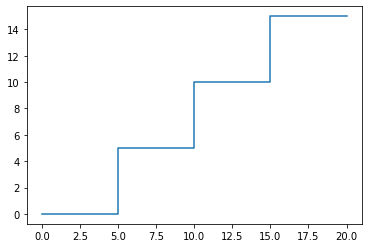

In [24]:
draw_coordinates(new_coordinates)

Como ves, el comando **repeat** es muy potente y nos va a proporcionar mucha capacidad de dibujo.

### Solución:

In [15]:
def decode_input(user_input, coordinates, direction):
    elements = user_input.split(' ')
    new_coordinates = coordinates.copy()
    instructions = get_instructions(user_input)
    for i in instructions:
        if elements[i].lower() == 'fd':
            coordinates = move(float(elements[i+1]), direction, coordinates, 1)
        elif elements[i].lower() == 'bk':
            coordinates = move(float(elements[i+1]), direction, coordinates, -1)
        elif elements[i].lower() == 'rt':
            direction -= float(elements[i+1]) 
        elif elements[i].lower() == 'lt':
            direction += float(elements[i+1])
        elif elements[i].lower() == 'repeat':
            repetitions = int(elements[i+1])
            command_to_repeat = " ".join(elements[i+2:])[1:-1]
            for repetition in range(repetitions):
                coordinates, direction = decode_input(command_to_repeat, coordinates, direction)
    return coordinates, direction

## Programa principal

Ya sólo nos queda construir el programa principal. La estructura es un bucle infinito en el que el usuario puede introducir comandos LOGO y la aplicación los interpreta. Para evitar que nuestro programa se quede bloqueado, tendrás que añadir la posibilidad de salir del blucle infinito cuando el usuario introduzca una **x** cen lugar de un comando de LOGO.

### Solución:

Welcome to our LOGO interpreter:
Input a LOGO command to move the tourtle (or x to exit): repeat 12 [rt 150 fd 100]


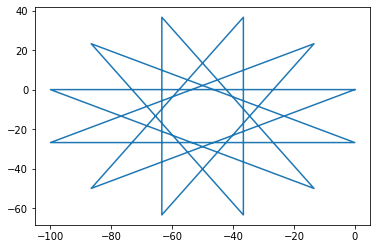

Input a LOGO command to move the tourtle (or x to exit): repeat 5 [fd 100 rt 72]


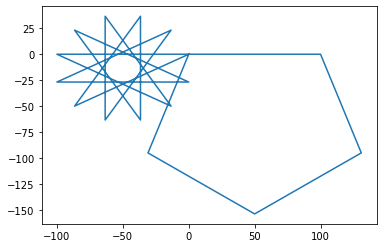

Input a LOGO command to move the tourtle (or x to exit): x


In [25]:
print('Welcome to our LOGO interpreter:')
user_input = ''
movements = [(0,0)]
tourtle_orientation = 0
while True:
    user_input = input('Input a LOGO command to move the tourtle (or x to exit): ')
    if user_input != 'x':
        movements, tourtle_orientation = decode_input(user_input, movements, tourtle_orientation)
        draw_coordinates(movements)
    else:
        break

::::{note} 
Como la ejecución de los notebooks de Jupyter se realiza en celdas, si nuestro código invoca dos veces al comando **plt.plot()**, esto se va a traducir en una nueva figura, como en el ejemplo anterior.

Para resolverlo, vamos a utilizar el siguiente comando para eliminar el contenido de la celda antes de hacer el **plt.plot()** de la nueva. De esta forma, el usuario tendrá la impresión de que el entorno de dibujo es único.

:::{code} 
from IPython.display import clear_output
clear_output(wait=True)
:::
::::

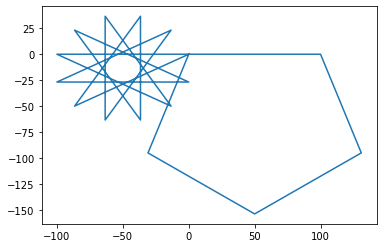

Input a LOGO command to move the tourtle (or x to exit): x


In [ ]:
from IPython.display import clear_output

print('Welcome to our LOGO interpreter:')
user_input = ''
movements = [(0,0)]
tourtle_orientation = 0
while True:
    user_input = input('Input a LOGO command to move the tourtle (or x to exit): ')
    if user_input != 'x':
        movements, tourtle_orientation = decode_input(user_input, movements, tourtle_orientation)
        clear_output(wait=True)
        draw_coordinates(movements)
    else:
        break

Si vuelves a introducir los mismos comandos que el primer ejemplo, verás que las figuras ya no se acumulan sino que desaparecen para que la nueva figura ocupe su lugar.

## Extensiones del Juego

De todos los capítulos de este libro, este es el más sencillo de extender ya que los lenguajes de programación se pueden complicar tanto como queramos. Podemos añadir más comandos a nuestro interprete de logo, algunos reales del LOGO original y otros inventados definidos por nosotros mismos. Otra posibilidad es añadir funcionalidades nuevas a nuestro programa principal. Aquí te damos algunas ideas:


* Mejora la función  **decode_input** para poder introducir comandos de tipo **repeat** en cualquier posición
* Busca alguna referencia del LOGO original e intenta implementar más comandos
* Puedes añadir comandos inventados, por ejemplo "poly N". Este comando dibujará un polinomio del número de lados indicado
* Puedes añadir comandos para del diseño de fractales. Este comando sería muy similar al comando repeat, pero modificando las dimensiones de los movimientos.
* Puedes añadir más funcionalidades al programa principal, por ejemplo: borrar la pantalla, seleccionar el color de la línea que va dejando la tortuga, salvar el dibujo realizado como un fichero JPG,...